# Exercice - Nettoyage et pré-traitement de données

Source des données : [Demandes de valeurs foncières (DVF) géolocalisées](https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/)

Importer les bibliothèques Python nécessaires, telles que `pandas` pour manipuler les données :

In [1]:
import pandas

from pandas.plotting import scatter_matrix

Extraire le jeu de données CSV avec la fonction `pandas.read_csv` :

In [2]:
df = pandas.read_csv("https://files.data.gouv.fr/geo-dvf/latest/csv/2018/departements/38.csv.gz")
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2018-530892,2018-01-02,1,Vente,180000.0,4.0,B,RUE DU GRESIVAUDAN,0212,38130.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.702184,45.151535
1,2018-530892,2018-01-02,1,Vente,180000.0,2.0,NaN,RUE DU GRESIVAUDAN,0212,38130.0,...,Appartement,96.0,4.0,NaN,NaN,NaN,NaN,NaN,5.702184,45.151535
2,2018-530893,2018-01-08,1,Vente en l'état futur d'achèvement,178000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.736908,45.180504
3,2018-530893,2018-01-08,1,Vente en l'état futur d'achèvement,178000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.736908,45.180504
4,2018-530894,2018-01-04,1,Vente,14000.0,1.0,NaN,RUE PEGOUD,5590,38100.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.738788,45.180822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60516,2018-558366,2018-05-29,1,Vente,124500.0,3153.0,NaN,RTE DU BEC DE L ORIENT,0050,38210.0,...,Dépendance,NaN,0.0,S,sols,NaN,NaN,517.0,5.553069,45.248553
60517,2018-558366,2018-05-29,1,Vente,124500.0,NaN,NaN,LE COING,B016,38210.0,...,NaN,NaN,NaN,P,prés,NaN,NaN,291.0,5.553160,45.248442
60518,2018-558367,2018-12-03,1,Vente,95000.0,NaN,NaN,LE RONZARET,B033,38590.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,36.0,5.303883,45.351487
60519,2018-558367,2018-12-03,1,Vente,95000.0,24.0,NaN,RUE DU RONZARET,0195,38590.0,...,Maison,149.0,4.0,S,sols,NaN,NaN,1200.0,5.303926,45.351580


Analyser le jeu de données dans son ensemble (colonnes, lignes, types de données, valeurs manquantes) :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60521 entries, 0 to 60520
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   60521 non-null  object 
 1   date_mutation                 60521 non-null  object 
 2   numero_disposition            60521 non-null  int64  
 3   nature_mutation               60521 non-null  object 
 4   valeur_fonciere               59840 non-null  float64
 5   adresse_numero                35816 non-null  float64
 6   adresse_suffixe               2167 non-null   object 
 7   adresse_nom_voie              59856 non-null  object 
 8   adresse_code_voie             59856 non-null  object 
 9   code_postal                   59856 non-null  float64
 10  code_commune                  60521 non-null  int64  
 11  nom_commune                   60521 non-null  object 
 12  code_departement              60521 non-null  int64  
 13  a

**Remarque** : un certain nombre de colonnes contiennent des valeurs nulles / manquantes ! En fonction des objectifs, certaines ne nous sont pas nécessairement utiles (`adresse_numero`), d'autres sont primordiales (`valeur_fonciere`, `surface_reelle_bati`, `nombre_pieces_principales`). Gardons cela en tête pour la suite, il est très probable que nous aillons à effectuer un nettoyage de données.

Afficher les statistiques des variables quantitatives :

In [4]:
df.describe()

,numero_disposition,valeur_fonciere,adresse_numero,code_postal,code_commune,code_departement,ancien_code_commune,numero_volume,lot1_numero,lot1_surface_carrez,...,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,60521.000000,5.984000e+04,35816.000000,59856.000000,60521.000000,60521.0,482.000000,153.000000,23198.000000,6266.000000,...,25.000000,72.000000,9.000000,60521.000000,36378.000000,25780.000000,36309.000000,37088.000000,58742.000000,58742.000000
mean,1.091803,2.839811e+05,828.410543,38370.343257,38290.117496,38.0,38331.962656,18.934641,156.097681,66.038110,...,76.192400,60.291667,156.362222,0.468862,2.184782,121.635609,2.186538,1849.724790,5.523257,45.333003
std,0.524356,8.431927e+05,2022.885869,250.993787,169.512275,0.0,143.787347,45.645902,1040.105179,71.631808,...,60.529917,113.888930,134.368195,0.702060,0.936413,1061.258289,2.066014,6611.398178,0.333121,0.218956
min,1.000000,5.000000e-01,1.000000,38000.000000,38001.000000,38.0,38016.000000,1.000000,1.000000,0.600000,...,12.500000,2.000000,14.580000,0.000000,1.000000,1.000000,0.000000,1.000000,4.754885,44.713886
25%,1.000000,7.400000e+04,10.000000,38150.000000,38169.000000,38.0,38274.000000,2.000000,12.000000,39.000000,...,28.460000,8.750000,66.000000,0.000000,1.000000,50.000000,0.000000,209.000000,5.278512,45.177108
50%,1.000000,1.600000e+05,33.000000,38320.000000,38253.000000,38.0,38367.000000,3.000000,35.000000,62.550000,...,66.000000,23.500000,110.800000,0.000000,2.000000,75.000000,2.000000,621.000000,5.603267,45.310913
75%,1.000000,2.527000e+05,188.000000,38540.000000,38443.000000,38.0,38435.000000,11.000000,102.000000,80.400000,...,100.900000,48.000000,177.900000,1.000000,3.000000,103.000000,4.000000,1390.000000,5.740632,45.524631
max,28.000000,6.891600e+07,9999.000000,38980.000000,38567.000000,38.0,38560.000000,301.000000,72049.000000,3757.000000,...,221.540000,691.000000,413.000000,30.000000,4.000000,95909.000000,21.000000,554805.000000,6.304720,45.877846


Sélectionner uniquement les colonnes d'intérêt :

In [5]:
raw_dataset = df.loc[:, ["date_mutation", "nature_mutation", "valeur_fonciere", "nom_commune", "type_local", "surface_reelle_bati", "nombre_pieces_principales", "latitude", "longitude"]]
raw_dataset

,date_mutation,nature_mutation,valeur_fonciere,nom_commune,type_local,surface_reelle_bati,nombre_pieces_principales,latitude,longitude
0,2018-01-02,Vente,180000.0,Échirolles,Dépendance,NaN,0.0,45.151535,5.702184
1,2018-01-02,Vente,180000.0,Échirolles,Appartement,96.0,4.0,45.151535,5.702184
2,2018-01-08,Vente en l'état futur d'achèvement,178000.0,Grenoble,NaN,NaN,NaN,45.180504,5.736908
3,2018-01-08,Vente en l'état futur d'achèvement,178000.0,Grenoble,NaN,NaN,NaN,45.180504,5.736908
4,2018-01-04,Vente,14000.0,Grenoble,Dépendance,NaN,0.0,45.180822,5.738788
...,...,...,...,...,...,...,...,...,...
60516,2018-05-29,Vente,124500.0,Montaud,Dépendance,NaN,0.0,45.248553,5.553069
60517,2018-05-29,Vente,124500.0,Montaud,NaN,NaN,NaN,45.248442,5.553160
60518,2018-12-03,Vente,95000.0,Brézins,NaN,NaN,NaN,45.351487,5.303883
60519,2018-12-03,Vente,95000.0,Brézins,Maison,149.0,4.0,45.351580,5.303926


Filtrer uniquement les ventes d'appartements :

In [6]:
filtered_dataset = raw_dataset[(raw_dataset["nature_mutation"] == "Vente") & ((raw_dataset["type_local"] == "Appartement"))]
filtered_dataset

,date_mutation,nature_mutation,valeur_fonciere,nom_commune,type_local,surface_reelle_bati,nombre_pieces_principales,latitude,longitude
1,2018-01-02,Vente,180000.0,Échirolles,Appartement,96.0,4.0,45.151535,5.702184
5,2018-01-08,Vente,131000.0,Échirolles,Appartement,60.0,3.0,45.144904,5.726591
7,2018-01-08,Vente,205162.0,La Tronche,Appartement,66.0,3.0,45.202911,5.752812
11,2018-01-09,Vente,352500.0,Grenoble,Appartement,126.0,4.0,45.199832,5.739612
12,2018-01-03,Vente,233000.0,Grenoble,Appartement,60.0,2.0,45.195888,5.730113
...,...,...,...,...,...,...,...,...,...
60436,2018-12-19,Vente,450000.0,Saint-Étienne-de-Saint-Geoirs,Appartement,80.0,3.0,45.347537,5.338617
60439,2018-12-21,Vente,123950.0,Moirans,Appartement,82.0,4.0,45.330621,5.560326
60461,2018-12-27,Vente,258000.0,Rovon,Appartement,68.0,3.0,45.195115,5.444058
60463,2018-12-27,Vente,258000.0,Rovon,Appartement,82.0,3.0,45.195115,5.444058


In [7]:
filtered_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11367 entries, 1 to 60488
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_mutation              11367 non-null  object 
 1   nature_mutation            11367 non-null  object 
 2   valeur_fonciere            11362 non-null  float64
 3   nom_commune                11367 non-null  object 
 4   type_local                 11367 non-null  object 
 5   surface_reelle_bati        11366 non-null  float64
 6   nombre_pieces_principales  11366 non-null  float64
 7   latitude                   11186 non-null  float64
 8   longitude                  11186 non-null  float64
dtypes: float64(5), object(4)
memory usage: 888.0+ KB


Certaines ventes ont des informations manquantes : valeur foncière, surface réelle, nombre de pièces principales, latitude, longitude.

Observons ces données incomplètes. Ignorons pour le moment la latitude et longitude car cela représente un échantillon conséquent :

In [8]:
filtered_dataset[filtered_dataset[["valeur_fonciere", "surface_reelle_bati", "nombre_pieces_principales"]].isna().any(axis=1)]

,date_mutation,nature_mutation,valeur_fonciere,nom_commune,type_local,surface_reelle_bati,nombre_pieces_principales,latitude,longitude
3770,2018-05-15,Vente,NaN,Grenoble,Appartement,290.0,11.0,45.190737,5.732765
3771,2018-05-15,Vente,NaN,Grenoble,Appartement,290.0,11.0,45.190737,5.732765
18575,2018-09-11,Vente,NaN,Voreppe,Appartement,77.0,4.0,NaN,NaN
21914,2018-12-13,Vente,91150.0,Voreppe,Appartement,NaN,NaN,45.301064,5.622498
27325,2018-07-20,Vente,NaN,Fontaine,Appartement,64.0,4.0,45.188505,5.693427
27326,2018-07-20,Vente,NaN,Fontaine,Appartement,27.0,1.0,45.188505,5.693427


À ce stade il nous est impossible de trouver des valeurs de remplacement approximées (note : nous pourrions utiliser des méthodes de regroupement statistique) donc allons supprimer les lignes ayant des valeurs manquantes pour les caractéristiques valeur foncière, surface réelle et nombre de pièces principales :

In [9]:
clean_dataset = filtered_dataset[filtered_dataset[["valeur_fonciere", "surface_reelle_bati", "nombre_pieces_principales"]].notna().all(axis=1)]
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11361 entries, 1 to 60488
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_mutation              11361 non-null  object 
 1   nature_mutation            11361 non-null  object 
 2   valeur_fonciere            11361 non-null  float64
 3   nom_commune                11361 non-null  object 
 4   type_local                 11361 non-null  object 
 5   surface_reelle_bati        11361 non-null  float64
 6   nombre_pieces_principales  11361 non-null  float64
 7   latitude                   11181 non-null  float64
 8   longitude                  11181 non-null  float64
dtypes: float64(5), object(4)
memory usage: 887.6+ KB


Terminons avec les latitude et longitude manquantes. Nous pouvons approximer ces données manquantes de plusieurs manières :

- Effectuer un rapprochement avec d'autres caractéristiques mises de côté initialement (nom de rue, code postal, etc.)
- Appliquer une constante, par exemple les coordonnées du centre de la ville de Grenoble
- Appliquer les valeurs moyennes ou médianes de notre jeu de données

Nous allons utiliser la valeur médiane pour ces valeurs manquante, car c'est un mesure statistique dite "robuste", et cela permettra de ne pas changer la distribution statistique du jeu de données :

In [10]:
lat_lng_median = clean_dataset[["latitude", "longitude"]].median()
lat_lng_median

latitude     45.188786
longitude     5.711118
dtype: float64

In [11]:
clean_dataset.loc[:, ["latitude", "longitude"]] = clean_dataset[["latitude", "longitude"]].fillna(lat_lng_median)
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11361 entries, 1 to 60488
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_mutation              11361 non-null  object 
 1   nature_mutation            11361 non-null  object 
 2   valeur_fonciere            11361 non-null  float64
 3   nom_commune                11361 non-null  object 
 4   type_local                 11361 non-null  object 
 5   surface_reelle_bati        11361 non-null  float64
 6   nombre_pieces_principales  11361 non-null  float64
 7   latitude                   11361 non-null  float64
 8   longitude                  11361 non-null  float64
dtypes: float64(5), object(4)
memory usage: 887.6+ KB


Maintenant que nous avons rapidement pré-traité nos données, explorons la distribution et la correlation statistique entre certaines caractéristiques :

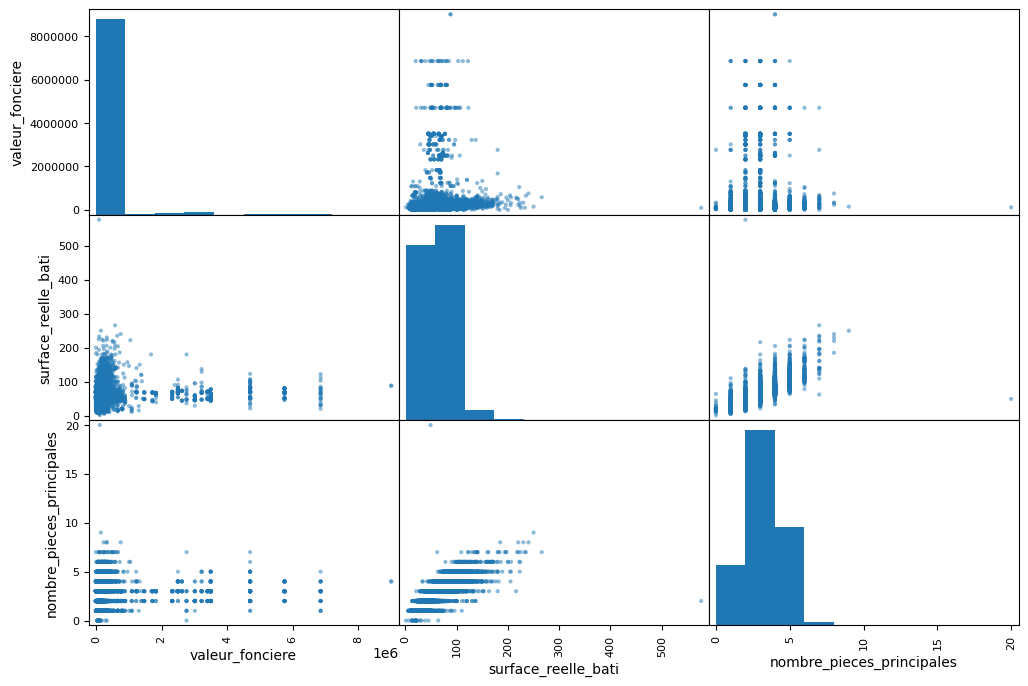

In [12]:
_ = scatter_matrix(clean_dataset[["valeur_fonciere", "surface_reelle_bati", "nombre_pieces_principales"]], figsize=(12, 8))

**Questions** :

- Que pouvons-nous observer ?
- Que pourrions effectuer comme analyses et traitements supplémentaires ?